## Dataset

1. We use the Bank Marketing Dataset from the UCI Machine Learning Repository.
Source: https://archive.ics.uci.edu/ml/datasets/bank+marketing

2. The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. Originally designed for supervised learning, but we will ignore the label initially

Important Decision:

Even though the dataset contains subscribed (whether the client subscribed to a term deposit), we do not use it to train the clustering model.
We may, however, use it later for interpretation only.

    # bank client data:
    1 - age (numeric)
    2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
    3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
    4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
    5 - default: has credit in default? (categorical: 'no','yes','unknown')
    6 - housing: has housing loan? (categorical: 'no','yes','unknown')
    7 - loan: has personal loan? (categorical: 'no','yes','unknown')
    # related with the last contact of the current campaign:
    8 - contact: contact communication type (categorical: 'cellular','telephone')
    9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
    10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
    11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
    # other attributes:
    12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
    13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
    14 - previous: number of contacts performed before this campaign and for this client (numeric)
    15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
    # social and economic context attributes
    16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
    17 - cons.price.idx: consumer price index - monthly indicator (numeric)
    18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
    19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
    20 - nr.employed: number of employees - quarterly indicator (numeric)
    21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

## task 1

### Requirements

The goal of this lab is to **explore the bank dataset, prepare it for clustering, and apply K-Means**.  
Follow these steps carefully and write down your observations.  

### **Exploratory Data Analysis (EDA)** (understanding the dataset and its characteristics)

For each feature, you should:

- Identify **numeric vs categorical features**  
- Check **distributions** of numeric features (min, max, mean, std, skewness)  
- Check **counts of categories** for categorical features  
- Identify **missing or unknown values** and decide how to handle them  
- Look for **correlations** between numeric features  
- Identify **outliers** that may affect clustering  

In [12]:
#Load dataset
import pandas as pd
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("bank-additional-full.csv", sep=';')
df.head()

Saving bank-additional-full.csv to bank-additional-full.csv


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [13]:
#Identify Numeric vs Categorical Features
numeric_features = df.select_dtypes(include=['int64','float64']).columns
categorical_features = df.select_dtypes(include=['object']).columns

print("Numeric Features:\n", numeric_features)
print("\nCategorical Features:\n", categorical_features)


Numeric Features:
 Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

Categorical Features:
 Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')


In [14]:
#Distribution of Numeric Features
df[numeric_features].describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [15]:
#Skewness
df[numeric_features].skew()

,0
age,0.784697
duration,3.263141
campaign,4.762507
pdays,-4.922190
previous,3.832042
emp.var.rate,-0.724096
cons.price.idx,-0.230888
cons.conf.idx,0.303180
euribor3m,-0.709188
nr.employed,-1.044262


In [16]:
#Category Counts
for col in categorical_features:
    print(f"\n{col}")
    print(df[col].value_counts())



job
job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

marital
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64

education
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64

default
default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64

housing
housing
yes        21576
no         18622
unknown      990
Name: count, dtype: int64

loan
loan
no         33950
yes         6248
unknown      990
Name: count, dtype: int64

contact
contact
ce

In [17]:
#Check Missing / Unknown Values
df.isnull().sum()
for col in categorical_features:
    print(f"{col} unknown count:", (df[col] == 'unknown').sum())


job unknown count: 330
marital unknown count: 80
education unknown count: 1731
default unknown count: 8597
housing unknown count: 990
loan unknown count: 990
contact unknown count: 0
month unknown count: 0
day_of_week unknown count: 0
poutcome unknown count: 0
y unknown count: 0


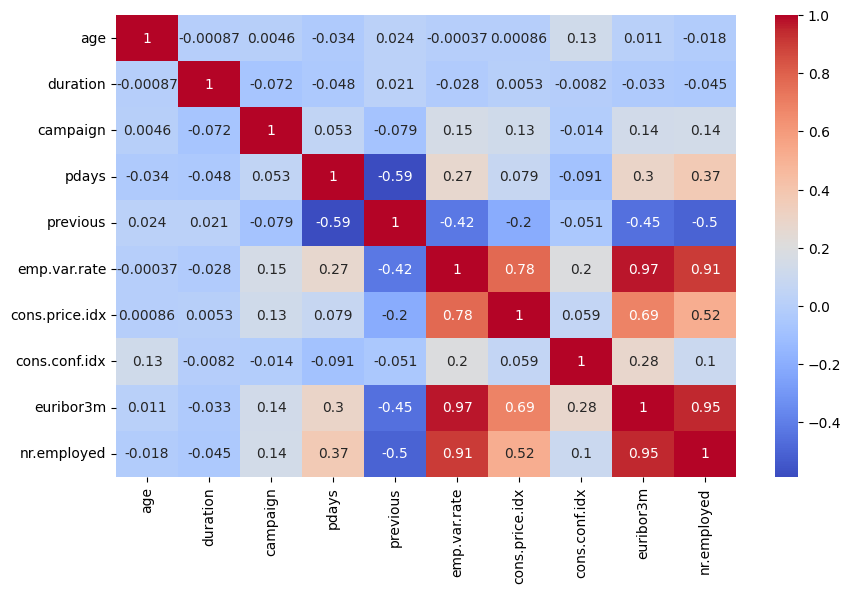

In [18]:
#Correlation Between Numeric Features
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df[numeric_features].corr(), annot=True, cmap='coolwarm')
plt.show()


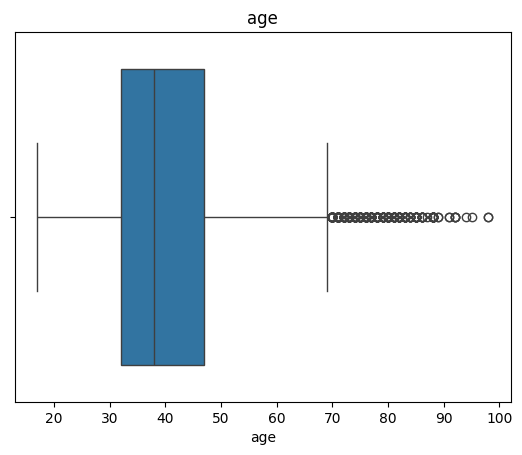

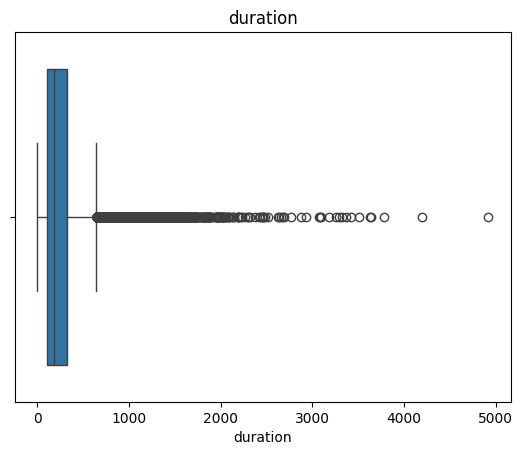

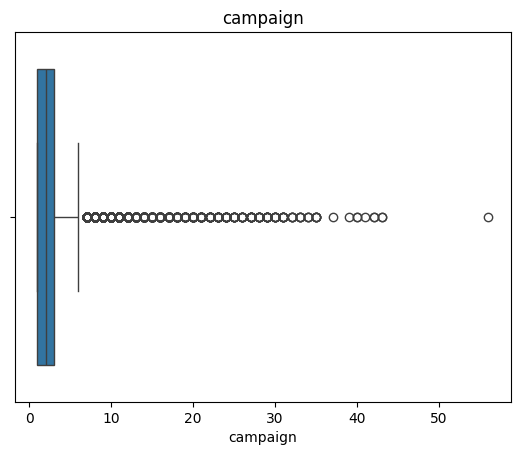

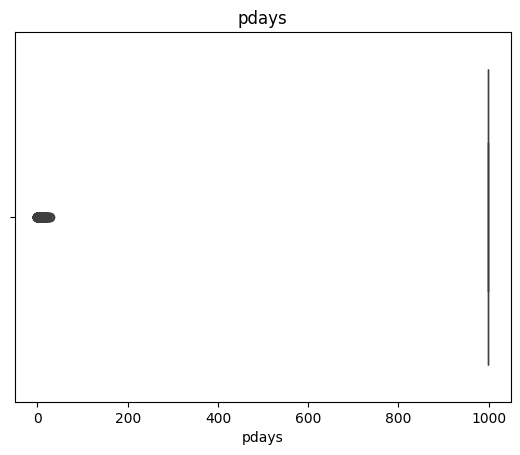

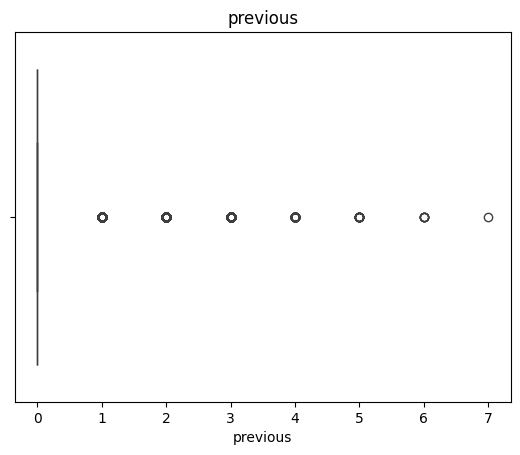

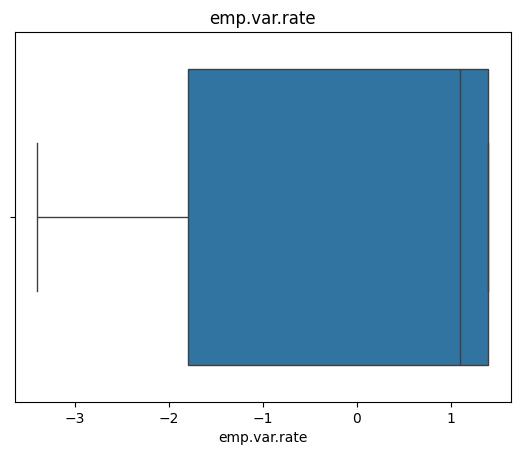

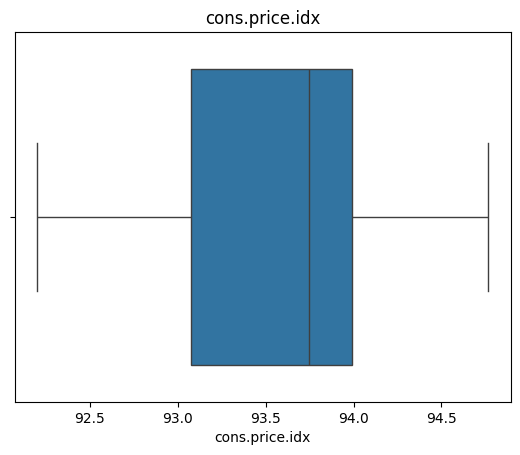

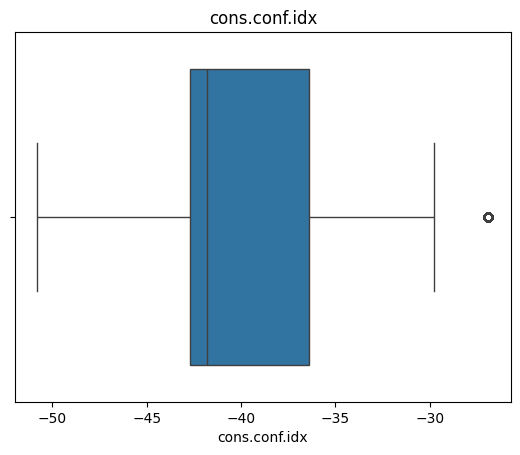

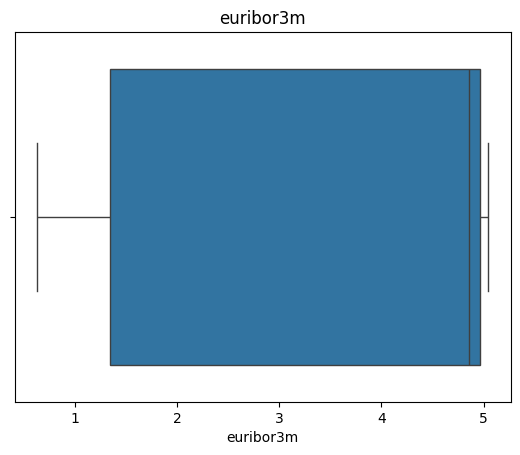

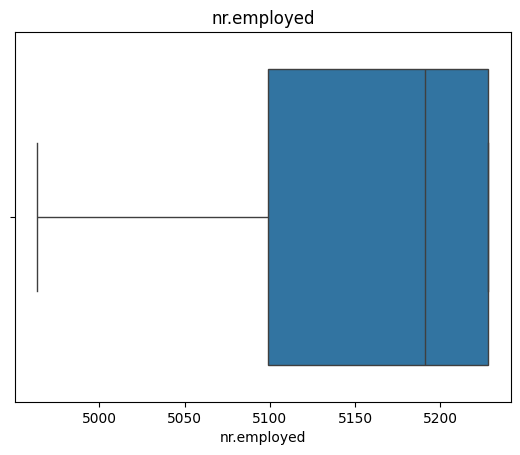

In [19]:
#Identify Outliers (Boxplots)
for col in numeric_features:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()


### **Data Preparation**

Before applying K-Means:

- Drop irrelevant or target columns
- Encode categorical features into numeric format
- Scale numeric features so all are comparable for distance calculations  
- Check that the final dataset has **no missing values** and **all features are numeric**  

In [22]:
#Drop Target & Irrelevant Columns
df_clustering = df.drop(columns=['y'])
display(df_clustering)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6


In [27]:
df_encoded = pd.get_dummies(df_clustering, drop_first=True)
display(df_encoded)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,True,False,False,False,True,False
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,True,False,False,False,True,False
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,True,False,False,False,True,False
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,True,False,False,False,True,False
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,False,True,False,False,False,False,False,False,True,False
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,False,True,False,False,False,False,False,False,True,False
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,False,True,False,False,False,False,False,False,True,False
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,False,True,False,False,False,False,False,False,True,False


In [25]:
#Encode Categorical Features
df_encoded = pd.get_dummies(df_clustering, drop_first=True).astype(int)
display(df_encoded)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1,93,-36,4,5191,...,1,0,0,0,1,0,0,0,1,0
1,57,149,1,999,0,1,93,-36,4,5191,...,1,0,0,0,1,0,0,0,1,0
2,37,226,1,999,0,1,93,-36,4,5191,...,1,0,0,0,1,0,0,0,1,0
3,40,151,1,999,0,1,93,-36,4,5191,...,1,0,0,0,1,0,0,0,1,0
4,56,307,1,999,0,1,93,-36,4,5191,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1,94,-50,1,4963,...,0,1,0,0,0,0,0,0,1,0
41184,46,383,1,999,0,-1,94,-50,1,4963,...,0,1,0,0,0,0,0,0,1,0
41185,56,189,2,999,0,-1,94,-50,1,4963,...,0,1,0,0,0,0,0,0,1,0
41186,44,442,1,999,0,-1,94,-50,1,4963,...,0,1,0,0,0,0,0,0,1,0


In [29]:
#Scale Features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_encoded)
display(scaled_data)


array([[ 1.53303429,  0.01047142, -0.56592197, ..., -0.4960667 ,
         0.39770593, -0.1857    ],
       [ 1.62899323, -0.42150051, -0.56592197, ..., -0.4960667 ,
         0.39770593, -0.1857    ],
       [-0.29018564, -0.12451981, -0.56592197, ..., -0.4960667 ,
         0.39770593, -0.1857    ],
       ...,
       [ 1.53303429, -0.26722482, -0.20490853, ..., -0.4960667 ,
         0.39770593, -0.1857    ],
       [ 0.38152696,  0.70856893, -0.56592197, ..., -0.4960667 ,
         0.39770593, -0.1857    ],
       [ 3.26029527, -0.07438021,  0.15610492, ..., -0.4960667 ,
        -2.51442063, -0.1857    ]])

In [31]:
#Final Check
pd.DataFrame(scaled_data).isnull().sum().sum()

np.int64(0)

### **Apply K-Means Clustering**

- Decide an initial number of clusters (K)  
- Fit the K-Means model to your prepared dataset  
- Assign each data point to a cluster

In [32]:
#Choose Initial K
from sklearn.cluster import KMeans
#Fit the K-Means model to your prepared dataset
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(scaled_data)


KMeans(n_clusters=2, random_state=42)

In [33]:
#Assign Clusters
clusters = kmeans.labels_
df_encoded['Cluster'] = clusters
df_encoded.head()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,Cluster
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,False,False,True,False,False,False,True,False,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,False,False,True,False,False,False,True,False,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,False,False,True,False,False,False,True,False,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,False,False,True,False,False,False,True,False,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,False,False,True,False,False,False,True,False,0


### **Choosing the Convenient K**

- Use **Elbow Method**: plot Sum of Squared Distances (SSD) vs K  
- Identify the **elbow point** where SSD reduction slows  
- Calculate **Silhouette scores** to validate K  

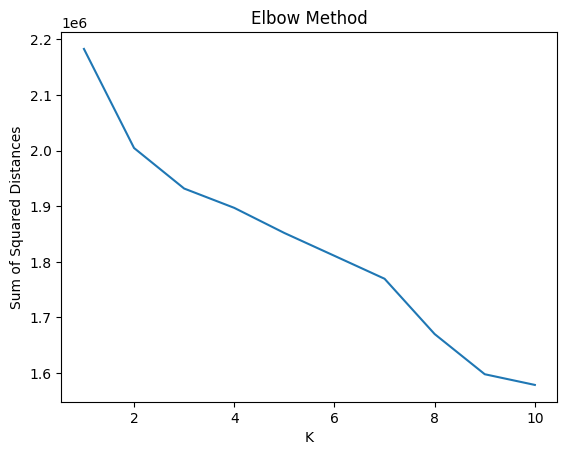

In [34]:
#Elbow Method
ssd = []

for k in range(1,11):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(scaled_data)
    ssd.append(model.inertia_)

plt.plot(range(1,11), ssd)
plt.xlabel("K")
plt.ylabel("Sum of Squared Distances")
plt.title("Elbow Method")
plt.show()


In [35]:
#Silhouette Score
from sklearn.metrics import silhouette_score

for k in range(2,11):
    model = KMeans(n_clusters=k, random_state=42)
    labels = model.fit_predict(scaled_data)
    score = silhouette_score(scaled_data, labels)
    print(f"K={k}, Silhouette Score={score}")


K=2, Silhouette Score=0.12236968560213422
K=3, Silhouette Score=0.05089866620204413
K=4, Silhouette Score=0.05563729457503009
K=5, Silhouette Score=0.06198767663591946
K=6, Silhouette Score=0.05954234208727952
K=7, Silhouette Score=0.06010923652168588
K=8, Silhouette Score=0.08424497842385464
K=9, Silhouette Score=0.09063609020107866
K=10, Silhouette Score=0.08362551996333993
